In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catgka/dog.jpeg
/kaggle/input/catgka/cat.jpeg
/kaggle/input/catgka/car.jpeg
/kaggle/input/truckop/101883140-5438832203_da6d83ccd6_o.jpg
/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [19]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [20]:
print(x_train.shape)

(50000, 32, 32, 3)


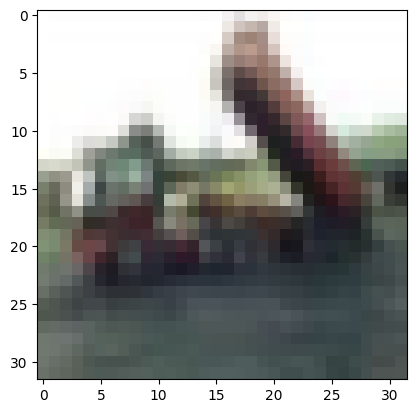

In [21]:
plt.imshow(x_train[2])

In [22]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

In [23]:
print(x_train.shape)

(50000, 32, 32, 3)


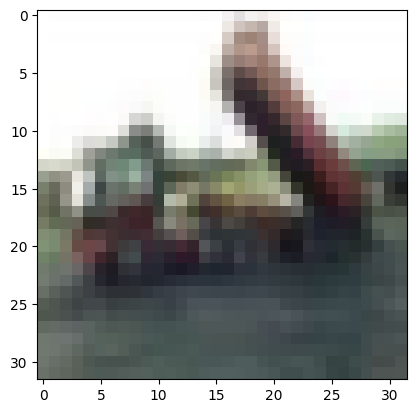

In [15]:
plt.imshow(x_train[2])

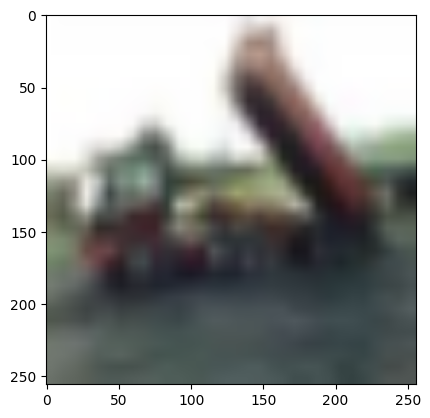

In [24]:
import cv2
# from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
img = x_train[2]
# img_blur = cv2.GaussianBlur(img, (5,5),0)
# img_sharp = unsharp_mask(img, radius=0, amount=0)
img_resized= cv2.resize(img, (256,256))
# plt.imshow(img_sharp)
plt.imshow(img_resized, vmin=0, vmax=255)
plt.show()

In [7]:
from functools import partial
from tensorflow import keras
from tensorflow.keras import layers

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, padding="same", activation = 'relu',kernel_initializer="he_normal")
model1 = tf.keras.Sequential(
    [
        DefaultConv2D(filters=1024, kernel_size=7,input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        layers.MaxPool2D(),        
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        layers.MaxPool2D(),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         layers.MaxPool2D(),
#         DefaultConv2D(filters=512),
#         DefaultConv2D(filters=512),
#         layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.4),
        layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

first=model1.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.1)


Epoch 1/30
352/352 [==============================] - 52s 118ms/step - loss: 1.8958 - accuracy: 0.3213 - val_loss: 1.5931 - val_accuracy: 0.4336
Epoch 2/30
352/352 [==============================] - 40s 112ms/step - loss: 1.4660 - accuracy: 0.4720 - val_loss: 1.3960 - val_accuracy: 0.5110
Epoch 3/30
352/352 [==============================] - 38s 109ms/step - loss: 1.2718 - accuracy: 0.5491 - val_loss: 1.2164 - val_accuracy: 0.5854
Epoch 4/30
352/352 [==============================] - 38s 109ms/step - loss: 1.1162 - accuracy: 0.6127 - val_loss: 1.1124 - val_accuracy: 0.6172
Epoch 5/30
352/352 [==============================] - 38s 108ms/step - loss: 0.9957 - accuracy: 0.6573 - val_loss: 0.9071 - val_accuracy: 0.6810
Epoch 6/30
352/352 [==============================] - 38s 108ms/step - loss: 0.8948 - accuracy: 0.6913 - val_loss: 0.8935 - val_accuracy: 0.6932
Epoch 7/30
352/352 [==============================] - 39s 112ms/step - loss: 0.8236 - accuracy: 0.7193 - val_loss: 0.8779 - val_ac

KeyboardInterrupt: 

In [9]:

score1 = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Test loss: 0.9056798815727234
Test accuracy: 0.7465000152587891


In [16]:
import cv2
# Load an image to predict (replace with your own image)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
img = cv2.imread('/kaggle/input/truckop/101883140-5438832203_da6d83ccd6_o.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Preprocess the image for prediction
img = cv2.resize(img, (32, 32))
img = img.astype('float32')/ 255.0
# img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

# Make a prediction on the image
pred = model1.predict(img)

print(pred)
# Get the predicted class label
class_label = np.argmax(pred[0])

# Get the predicted class name
class_name = class_names[class_label]

# Print the predicted class name
print('Predicted class:', class_name)


1/1 [==============================] - 0s 20ms/step
[[9.9984860e-01 2.6584546e-10 6.8119014e-05 8.2919478e-08 4.8878105e-06
  2.7188674e-10 1.6104701e-10 8.6134384e-11 7.8356512e-05 2.3293262e-10]]
Predicted class: airplane
